In [399]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [400]:
# Reading Data

titanic_data = pd.read_csv('train.csv')

In [401]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [402]:
# Checking Number of Rows And Columns in Dataset

titanic_data.shape

(891, 12)

In [403]:
# TAKING ADDITIONAL INFORMATION ABOUT DATASET

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [404]:
# check number of missing value in each column

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [405]:
 #Handling Missing values

titanic_data = titanic_data.drop(columns = 'Cabin', axis = 1)

In [406]:
#filling the missing value in Age column

titanic_data.fillna(titanic_data['Age'].mean(), inplace = True)

In [407]:
# find the mode of the embarked column

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [408]:
# replacing the missing values in Embarked column with mode value

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [409]:

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [410]:
# getting some statistical measure about the data

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [411]:
#finding the number of people survived or not survived
# 0 - Not Survived
# 1 - Survived

titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [412]:
# Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

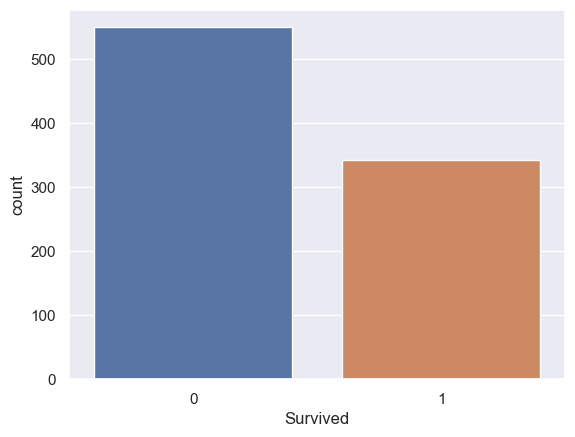

In [413]:
 sns.countplot(titanic_data , x = 'Survived')

In [414]:
titanic_data['Sex'].value_counts()



Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

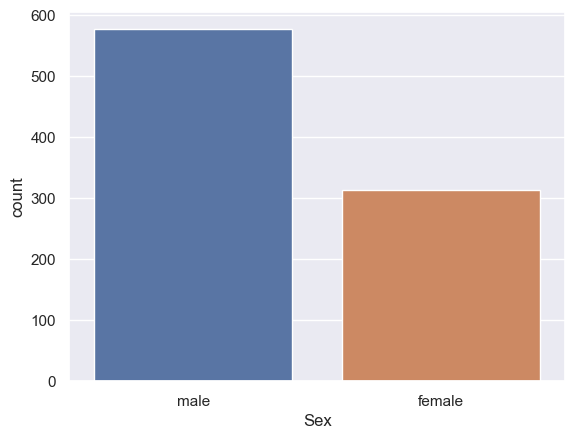

In [415]:
sns.countplot(titanic_data , x = 'Sex')

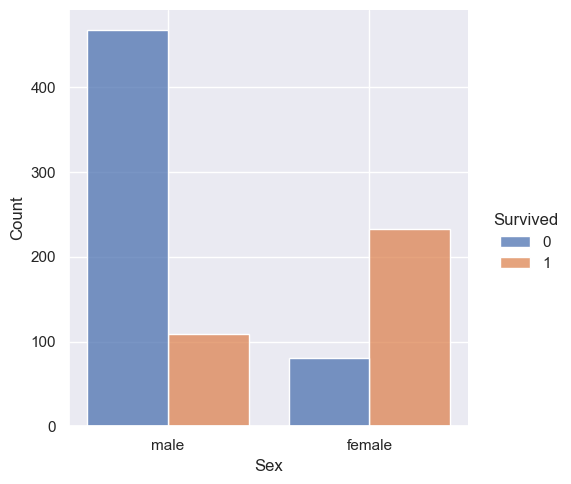

In [416]:
sns.displot(titanic_data, x="Sex", hue="Survived",multiple="dodge", shrink=.8)

<Axes: xlabel='Pclass', ylabel='count'>

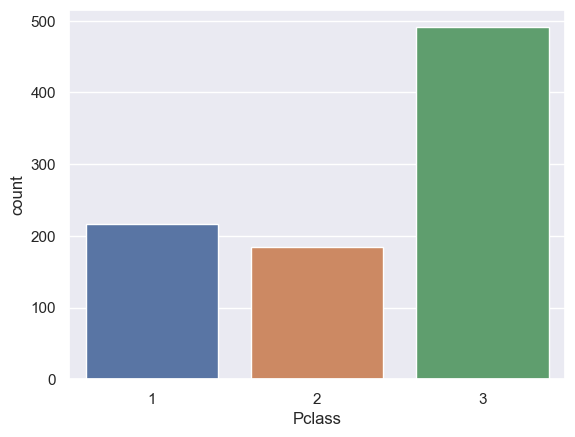

In [417]:
 sns.countplot(titanic_data, x = 'Pclass')

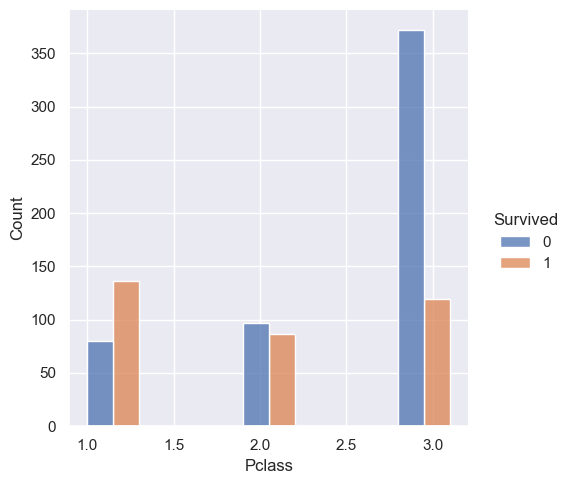

In [418]:
 sns.displot(titanic_data, x = 'Pclass', hue = 'Survived',multiple="dodge",binwidth = 0.3)

In [419]:
# Converting Categorical Columns 

titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [420]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [421]:
 # Droping unwanted Columns

titanic_data = titanic_data.drop(columns = {'PassengerId','Name','Ticket'}, axis = 1)

In [422]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [423]:
#Separating Features and Targets

X = titanic_data.drop(columns = 'Survived', axis=1)
Y = titanic_data['Survived']

In [424]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]


In [425]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [426]:
#Splitting the data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 13)

In [427]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (623, 7) (268, 7)


In [428]:
# Model Training

In [429]:
#Logistic Regression

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [430]:
#Logistic Regression Model Evaluation on Training dataset

X_train_prediction = model1.predict(X_train)

In [431]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of Training Dataset : ',training_data_accuracy )

Accuracy score of Training Dataset :  0.7993579454253612


In [432]:
#Logistic Regression Model Evaluation on Testing dataset

X_test_prediction = model1.predict(X_test)

In [433]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of Testing Dataset : ',testing_data_accuracy )

Accuracy score of Testing Dataset :  0.7985074626865671


In [441]:
#Testing on Random Data
'''
Here as random data I have taken -
1. Person traveling from 1st class
2. Person is Female
3. Person is 34 year old
4. Person has 1 SibSp
5. Person has 0 Parch
6. Person ticket cost 53.100$
7. Person Borded from S port
'''

random_testing = model1.predict([[1,1 ,34,1,0,53.100,0]])

if (random_testing == 1):
    print('Survived')
else:
    print('Not Survived!')

Survived
